<h1><center>Data science for Geographers</center></h1>

<h2><center>Practical 1 - Data cleaning and organising using R</center></h2>

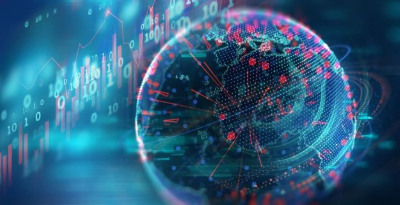

## Contents<a class="anchor" id="contents"></a>

- 1. [Introduction](#section1)
    - [The research question](#section1.1)
    - [Data files](#section1.2)
    - [The problem...](#section1.3)
- 2. [Importing packages in R](#section2)
    - [The tidyverse and `dplyr` command](#section2.1)
- 3. [Reading our data](#section3)
    - [The `readr()` package](#section3.1)
    - [More on delimiters](#section3.2)
    - [Tools for examining our data](#section3.3)
    - [Sorting our data with `arrange()`](#section3.4)
    - [Exercise](#exercise3)
- 4. [Data cleaning](#section4)
    - [Removing variables (columns) with `select()`](#section4.1)
    - [Renaming variables with `rename()`](#section4.2)
    - [Removing observations (rows) with `filter()`](#section4.3)
    - [Exercise](#exercise4)
- 5. [Data merging](#section5)
    - [Introduction](#section5.1)
    - [Data keys for matching and merging data files](#section5.2)
    - [Step 1: Checking variables are unique with `distinct()`](#section5.3)
    - [Step 2: Bringing tables together with `full_join()`](#section5.4)
    - [Step 3: Aggregating data with `group_by()` and `summarize()`](#section5.5)
    - [Step 4: Merging all of the remaining tables](#section5.6)
    - [Exercise](#exercise5)
- 6. [Variable recoding](#section6)
    - [Missing data](#section6.1)
    - [Recoding variables](#section6.2)
    - [Labelling variables](#section6.3)
    - [Exercise](#section6.4)
- 7. [Writing our new dataset to a file](#section7)
- 8. [Conclusion](#section8)

## 1. Introduction <a class="anchor" id="section1"></a>

Welcome to the practical exercises for Data Science for Geographers! Starting with this practical, we are going to work through all of the steps required for a research project based on quantitative data. As well as this additional exercises at the end of each practical independent exercises are provided to test your knowledge of what you have learned. In this first practical we are going to be looking at the process of managing and cleaning data so that is ready for analysis. This is an often neglected and under-appreciated part of the research process but it is also a crucial part of a successful analysis.


### The research question<a class="anchor" id="section1.1"></a>

Throughout these prcticals, we are going to be completing a research project where we are interested in finding out if there is a relationship between the area-level availabillity of tobacco products and area-level measures of health. This is currently a hot topic in public health as policy-makers are looking for new ways to reduce population smoking. Showing that the volume of retailers in local neighbourhoods is associated with smoking rates is important as it provides policy-makers with the evidence they require to implement policy that targets tobacco retailing licenses. Our analysis will be very similar to this one:

https://tobaccocontrol.bmj.com/content/tobaccocontrol/25/1/75.full.pdf

The only difference being that we will be using area-level data (i.e. data about geographical areas) rather than individual level data (i.e. data about individual people or units). The areas that we are going to focus on are known as "datazones". These are the smallest geographical units at which data will be released to the public in Scotland. Datazones are groups of 2011 Census output areas which have populations of around 500 to 1,000 residents.  There are 6,976 2011 Data Zones in Scotland. You can have a look at these in more detail here: 

https://simd.scot/#/simd2020/BTTTFTT/9/-4.0000/55.9000/

### Data files<a class="anchor" id="section1.2"></a>

We have been given five different data files that we need to work with and process, each containing different pieces of information for these datazones.

#### TobaccoRegister.csv
The first thing we need is an "exposure" variable i.e. the thing we think will be associated with smoking behaviour, in this case the numbers of tobacco retailers in each area. Luckily for us, the Scottish Government has this information recorded in the Scottish Register of Tobacco and Nicotine Vapour Product Retailers. You can view it here:

https://www.tobaccoregisterscotland.org/search-the-register/?Name=&Postcode=&LocalAuthority=&BusinessType=&ProductType=&PremisesStatus=

The website is basically an archive list of all the tobacco retailers in Scotland and includes information on the name of the retailer, the address and postcode and whether it is currently active. Some of you may remember back to fundamental methods in geography, when you were doing a GIS practical... one of the datasets you were using in that practical came from the information contained in this website. The data from the tobacco register is in a file called: `TobaccoRegister.csv`

Unfortunately for us, this file does does not contain a datazone variable so we will need to get this from somewhere else...

<b>NOTE! You may notice looking at the website that the data is not available to download as a spreadsheet. It is only available statically on the webpage. I used a process known as "web-scraping" to obtain the data using the python programming language. Web scraping can be a very useful method of data collection and is used to obtain data or information from web-pages. This can be anything including numerical information (as is the case here) or textual information (including things like newspaper articles, reports and even forum and comment section posts). I have created some additional jupyter notebooks that cover this and other skills in Python. You can see these in the "Extras folder. We won't be covering this in the class but if you are interested in learning more take a look!</b>

#### ScottishPostcodes.csv
This file is what we call a look-up file. It is so called because we use it to "look-up" other information. In this case it contains all of the postcodes in scotland along with corresponding codes for the datazone that the postcode falls within. We will use this to connect our tobacco data (which only has postcodes) to datazones. This data came from here: https://www.nrscotland.gov.uk/statistics-and-data/geography/our-products/scottish-postcode-directory/2020-2

#### simd2020.csv
This data contains all of the variables from the Scottish Index of Multiple Deprivation (SIMD). The SIMD contains lots of infoirmation at the datazone level including levels of health, unemployment, crime and others in each datazone. It also contains information about things like the total population in each datazone. This dataset will be used to add background information about the datazones to our analysis. The importance of this information (plus the urban and rural information below) will become clear later in our analysis!

#### urban_rural.csv
This dataset contains some additional useful information about the datazones; whether they are urban or rural or not. This dataset came from here: https://www2.gov.scot/Publications/2018/03/6040/downloads

#### smoking-at-booking.csv
This dataset contains smoking rates among pregnant women per datazone for different years (2012-2014, 2013-2015 etc). This dataset will provide our "outcome" data. This is the only population-scale dataset on smoking behaviours that is available (the other sources we might use are social surveys and based on a sample). This data came from here (note it may take a while to load): https://statistics.gov.scot/resource?uri=http%3A%2F%2Fstatistics.gov.scot%2Fdata%2Fsmoking-at-booking

### The problem...<a class="anchor" id="section1.3"></a>

The main problem with what we want do do is that datazones are larger than individual postcodes so we have to do some manipulation to our data to format in the way that we want. When we have completed this practical, we will have a dataset whcih will consist of an observation (or row) per datazone (so 6,976 rows in total) with each row having a number of variables e.g. tobacco retailers, smoking rate, level of deprivation etc. Something like this...

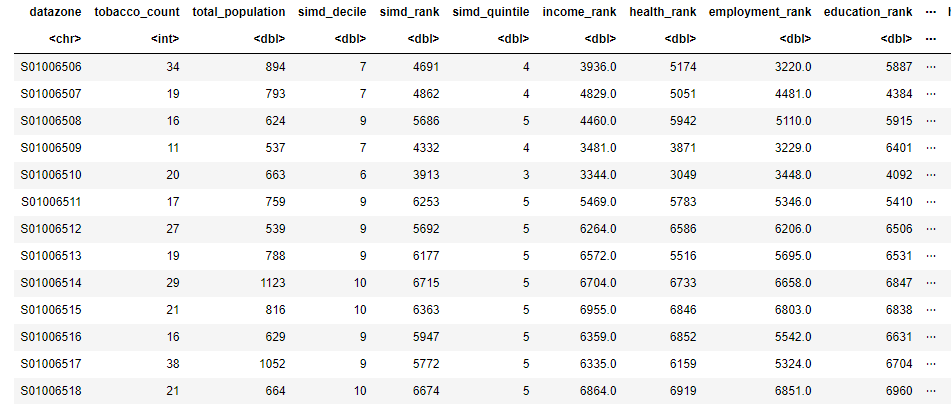

#### [Go back to table of contents](#contents)

## 2. Importing packages in R <a class="anchor" id="section2"></a>

### The tidyverse and dplyr<a class="anchor" id="section2.1"></a>
As you may have learned in "Key methods", R consists of lots and lots of different add-on packages or libraries that extend the functionality ofthe core software in lots of useful and helpful ways. In order to complete the exercises, we'll need to import some of these.  We do this using the `library()` command. We are going to be using something called the `tidyverse` which is a collection of libraries written by a famous R user called Hadley Wickham. The `tidyverse` is actually more akin to a particular implementation of the R language and is generally accepted as the easiest when learning data science approaches for the first time. More info on the tidyverse here: https://www.tidyverse.org/

Much of what we are going to be doing is written up in this book:

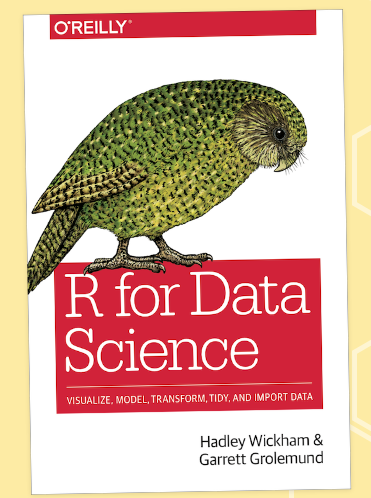

Which is very helpfully freely available online here: https://r4ds.had.co.nz/

It is definitly worth referring to as you learn these techniques! 

Within the `tidyverse` package it is the `dplyr` set of commands that we are going to use the most today. More info on `dplyr` here: https://dplyr.tidyverse.org/ 

Both links will be a really useful reference for you as you learn these techniques. I would reccomend bookmarking both in your web browser for easy access! 

So let's go ahead and load the packages we need. Before we do, let's note the use of the `#` symbol. This denotes a comment, in other words text in our code that is ignored by R but is used to document and annotate our code. It is good practice to make heavy use of comments so when you come back to your code you can remember what it was doing!

In [ ]:
#Load the tidyverse collection of packages
library(tidyverse)

#### [Go back to table of contents](#contents)

## 3. Reading our data <a class="anchor" id="section3"></a>

### The readr package<a class="anchor" id="section3.1"></a>
The first task we have is to read in all of our datasets into memory so we can access them and work with them. Let's start by making sure R knows where to look for our files. 

The code below does two things, firstly it `sets the working directory` hence `setwd` which means that R is now pointing to the directory where our files are stored. When using noteable the location is:

`/home/joyvan/...`

If or when you are working on your own computer it will need to be something different i.e. something like:

`c:\\Documents\\dissertation` etc etc

For these practical sessions I would reccomend copying all of the materials for each week (in this case the datafiles and the notebook itself) into a new folder called e.g. `week2` in your files area. That way you can go back to the original versions of the files if you need to (if something goes wrong). Once you do this you need to update where R is looking for the files. The code below assuems you have done this i.e. your files are located in `/home/joyvan/week2`

HINT: YOu will have done this in your key methods practical but if you need help with copying your files please ask! 

In [ ]:
#Point R to where your files are stored
setwd('/home/jovyan/week2')

We can check we are in the right place by using the command `list.files` which will list all of the files in the current working directory, as below...

In [ ]:
list.files()

Now we need to tell R to read in the datafiles into different objects so we can work with them. We do this using the `read_csv()` function from the `tidyverse` as below...

In [ ]:
simd <- read_csv('simd2020.csv')

There are a couple of things to note about this code. The first thing you'll notice is the `<-` which might look a bit odd. This is a really important concept in R as it is how we assign the results of a function to a new object. For example `smoking <- read_csv('smoking-at-booking.csv')` applies the function `read_csv` to the filename `smoking-at-booking.csv` and puts the result into an object called `smoking`. In this sense `<-` is roughly equivalent to an `=` sign. 
<b>This is a key concept in R...whenever you assign something in R you do so with a `<-` and not an `=`.</b>

### More on delimiters<a class="anchor" id="section3.2"></a>
You might be wondering what "CSV" means in the filename extension? This is quite an important concept so i'll explain it here. "CSV" stands for "comma separated values" and is a data file type that is universal and can be imported by almost any statistical software, including R. If you were to open a csv file in a notepad program, you would see something like this:

`name,surname,age,postcode
joe,bloggs,21,EH89XY`

As you can see, the first row is the column names and the second row is the values of each variable. As you can see, each individual piece of information in the file is <i>separated</i> by a symbol, in this case a comma. When importing files, the statistical software will look for these symbols and know to put the data into a separate cell. 

It is also possible, to use a different symbol if you need to. In our case all of our files are delimited by a `,` apart from our `TobaccoRegister.csv` data which cannot use a `,` and instead uses the `|` symbol. 

<b>Bonus point question: Can you think of a reason why we can't use a comma to delimit the tobacco register data?</b>

When not using a comma to delimit our data, we need to use a different command to read our data, `read_delim` as well as the delimiter that we are using.

In [ ]:
tobaccoregister <- read_delim('TobaccoRegister.csv', delim="|")

In [ ]:
head(tobaccoregister)
dim(tobaccoregister)

Note the `, delim="|"` part which specifies the correct symbol. What this shows is that we need to be aware of the format of our data and the symbol that is used to separate the values.

In [ ]:
head(tobaccoregister)

### Tools for examining our data<a class="anchor" id="section3.3"></a>
Now we have our data imported into R we can have a look at it with some useful commands.

The first of these is the `dim` function which returns the `dimensions` of our datasets...

In [ ]:
dim(simd)

You can see that the number of observations is on the left and the number of columns is the number on the right. You can see the datasets that relate to `datazones` as they each have `6976` observations.

Another useful tool is the `head()` function, which allows us to examine the top 6 rows of data and column names...

In [ ]:
#Examine the first few rows of each datafile
head(simd)

we can also specify how many rows we want with `n=...`...

In [ ]:
head(simd, n=30)

This command is useful but if the number of columns is large it will cut off some of the columns. 

Instead, to list all of the column names we can use `colnames()`...

In [ ]:
#Look at the column headers for each file
colnames(simd)

Now we can see that we have a lot of variables, many of them terribly named and many that we do not need. Our next task is to clean all of this up to make it easier to work with.

Before we do however, one last useful tool is the `arrange()` function which we can use to sort our data. 

### Sorting our data with arrange()<a class="anchor" id="section3.4"></a>

To do this we first specify the object we want to sort and then the variable we wish to sort by. So below we sort our `simd` dataset according to the `Total_population` variable...  

In [ ]:
arrange(simd, Total_population)

We can also do this in descending order by using the `desc` function within the `arrange` function...

In [ ]:
arrange(simd, desc(Total_population))

And we can sort by multiple variables (i.e. sort within other variables...) by adding the variables seperated with a comma.

In [ ]:
arrange(simd, SIMD2020v2_Decile, Total_population)

### Exercises<a class="anchor" id="exercise3"></a>

1. Read the remaining datasets (`"smoking-at-booking.csv", "urban_rural.csv" and "ScottishPostcodes.csv"`) into objects using `read_csv()`. Use the names `smoking`, `postcodes` and `urban_rural` to name these based on the contents of the file.
2. Look at the dimensions, the first few rows and the column names of the dataset objects that you just created.

Enter your answers into the code cell below. Once you have had a go at this, you can toggle the code solutions using the slider below.

In [ ]:
#Answers
#Part 1
postcodes <- read_csv('ScottishPostcodes.csv')
urban_rural <- read_csv('urban_rural.csv')
smoking <- read_csv('smoking-at-booking.csv')

#Part 2
dim(postcodes)
dim(urban_rural)
dim(smoking)

head(postcodes)
head(urban_rural)
head(smoking)

colnames(postcodes)
colnames(urban_rural)
colnames(smoking)

#### [Go back to table of contents](#contents)

## 4. Data cleaning <a class="anchor" id="section4"></a>

### Removing variables (columns) with select()<a class="anchor" id="section4.1"></a>
The first stage of our data cleaning is to remove excess variables that we dont need. this is often the first thing we do because it makes our datafiles much easier to manage and less cumbersome. If you are using big secondary data sources for your project these may have huge numbers of variables which you dont need so this will be very useful. 

We do this using the `select()` function. Let's start with the `smoking` dataset. Remember this contains smoking rates among pregnant women for all of the datazones in scotland for different years. For our analysis we are only interested in the latest years data which is 2017-2019. So our first task is to remove all of the other variables (apart from the datazone).

The code for this is pretty stratightforward. We start with the `select` function and then we supply the arguments to this function, starting with the name of the dataset `smoking`, followed by the name of variables we want to keep separated by a comma. We then reassign this new object, in this case to the same name `smoking`. <b>NOTE: this overwrites and replaces the previous object which is fine for the exercise but you may want to create a new object when you do this for real, otherwise you would need to re-import the data if you make a mistake.</b>

In [ ]:
head(smoking)

In [ ]:
#Trim smoking file
smoking <- select(smoking, datazone, '17_19')
head(smoking)

Note that because the variable `17_19` starts with a number we need to use quote marks to denote it as a string. The other two are letters so done need to be explicitly referenced as strings. <b>If you are unsure what a string is, come and ask us!</b>  

Let's do the same with the `postcodes` file. We only need the `Postcode, DataZone2011Code, DateOfIntroduction, DateOfDeletionpostcode` variables from this file. 

In [ ]:
head(postcodes)

In [ ]:
#Remove variables we dont need from the postcode file
postcodes <- select(postcodes, Postcode, DataZone2011Code, DateOfIntroduction, DateOfDeletion)
head(postcodes)

We need to remove other variables from other datasets but I want to use these remaining datasets to show how we can combine tasks using the `%>%` symbol a bit later on so will leave these for now. 

### Removing observations (rows) with filter()<a class="anchor" id="section4.2"></a>
As well as removing `variables` (columns) that we dont need we can also remove observations that are not needed. A good example of this is the postodes file because it contains records of postcodes that are no longer in active use. These postcodes are not of use to us because they wont be matched to a tobacco retailer postcode. We can filter these observations by using the `DateOfIntroduction` and `DateOfDeletion` variables. Let's look at these variables.

Note the use of `%>%` command in the code below (know in in the tidyverse as the "pipe" operator). It allows us to complete multiple functions on the same object. In this case we are saying "using the `postcode` object, display only the first 100 rows of data for only the two variables `DateOfIntroduction` and `DateOfDeletion` using the `select` function and the `head` function". We will see this more clearly later in the practical but for now it is enough to say that this is one of the most useful and helpful features of the tidyverse!

In [ ]:
head(postcodes %>% select(DateOfIntroduction,DateOfDeletion), n=100)

You can see that some of the postcodes have a date in the `DateOfDeletion` column. These postcodes are the ones that have been deleted and so we can remove them. The other ones have an `NA` which means the value is missing (because they are still in use). We can filter on this variable to remove the deleted postcodes... 

In [ ]:
postcodes <- filter(postcodes, is.na(DateOfDeletion))

#Display the new postcodes file
head(postcodes %>% select(DateOfIntroduction,DateOfDeletion), n=100)

The syntax is exactly the same as with `select`; we supply the name of the data object but in this case we also use `is.na(DateOfDeletion)` which basically means if the variable `DateOfDeletion` is missing a value (i.e. it has `NA`) keep it and remove everything else.  

We can of course also `filter` based on the value of a variable. A good example of this is filtering out the tobacco retailers that are "inactive". We wont be needing these records in our analysis. Lets take a look at the `tobaccoregister` data again to remind ourselves:

In [ ]:
head(tobaccoregister)

You can see that some of the retailers have "Inactive" in the `Status` column. We want to remove these and we can do that below. Note that because the value ofthe status variable is a string we need to use quote marks around `Active`. If it was just a number we wouldnt need the quote marks.

In [ ]:
tobaccoregister <- filter(tobaccoregister, Status=="Active")

head(tobaccoregister, n=100)

### Renaming variables with rename()<a class="anchor" id="section4.3"></a>
As well as removing observations and variables, we may also want to rename some of the variables. Some of our data files have really clunky and cumbersome names which are difficult to manage. We can change this with `rename()`.

You will be pleased to know that the syntax for this is exactly the same as before with `select()` and `filter()`. The only difference is we need to supply the new name for the variables we want rename. 

Let's look at the smoking file and look at how to change the name of the variable `17_19` to `smoking_rate`...

In [ ]:
head(smoking)

In [ ]:
smoking <- rename(smoking, smoking_rate = '17_19')
head(smoking)

The key thing to remember here is that the new variable name comes first, then the `=` sign and then the name of the variable you are changing.

Let's do the same with renaming variables in the `postcodes` file, only this time let's take advantage of the fact that we can change multiple variables at once.  It is always good practice to name your variables in lowercase letters so we'll change `Postcode` to `postcode` and also rename the dates of deletion and introduction as well. 

We can do this by just separating each variable in the renaming command with a comma e.g. `postcode = "Postcode", date_introduced = "DateOfIntroduction",  date_deleted = DateOfDeletion`. Note when we do this it makes the line of code very long so pressing enter after the comma breaks the code into multiple lines to make it easier to read, but the functioning of the code remains unchanged.

In [ ]:
#Rename postcode field
postcodes <- rename(postcodes, 
                    postcode = "Postcode", 
                    date_introduced = "DateOfIntroduction",  
                    date_deleted = "DateOfDeletion")

head(postcodes)

Now let's do the same with the `simd` data which is more complicated. Let's remind ourselves of the columns in the `simd`data:

In [ ]:
colnames(simd)

As you can see there are a lot of variables here many with cumbersome and long names and many that we dont actually need. Wouldnt it be great to be able to do all of these tasks (renaming and selecting variables) in one command? This is a really good opportunity to demonstrate why the `%>%` is so important... 

What we are going to do here is use the `%>%` to take the output from our rename function and pass it to a `select` function to select only the variables that we have renamed. In other words we are going to chain together multiple function calls into one command using the code below. Let's run it, see what it does and then we'll discuss it in more detail below...

In [ ]:
#rename the variables in the simd file
simd <- simd %>%
    rename(datazone = "Data_Zone",
           total_population = "Total_population", 
           simd_decile = "SIMD2020v2_Decile",
           simd_rank = "SIMD2020v2_Rank",
           simd_quintile = "SIMD2020v2_Quintile",
           income_rank = "SIMD2020v2_Income_Domain_Rank",
           health_rank = "SIMD2020_Health_Domain_Rank",
           employment_rank = "SIMD2020_Employment_Domain_Rank",
           education_rank = "SIMD2020_Education_Domain_Rank",
           access_rank = "SIMD2020_Access_Domain_Rank",
           crime_rank = "SIMD2020_Crime_Domain_Rank",
           housing_rank = "SIMD2020_Housing_Domain_Rank",
           alcohol_admissions = "ALCOHOL",
           drug_admissions = "DRUG") %>%
           select(datazone, total_population, simd_decile, simd_rank, simd_quintile, income_rank, health_rank, employment_rank,
           education_rank, access_rank, crime_rank, housing_rank, alcohol_admissions, drug_admissions)

#Display this new data
head(simd, n=20)

Let's work through how this has worked...

By starting with `simd %>%` we are saying use the `simd` data object for every action that we take following this line. In other words first rename all of our variables, all the way to `drug_admissions` using the`rename()` function and then, by adding a second `%>%` command we can take the output from this first `rename` function and use it as the input to the `select` function to keep only the variables specified. The key here is that at no point is the `simd` object referenced in the rest of the command after the first `%>%` because the `%>%` symbol tells R to just keep using the object. This is a really powerful feature of the tidyverse because it allows us to easily "chain" together multiple and complex steps into one command. In other words we can do this with almost any combination of functions.

Of course, you dont need to do this. You could just individually rename each variable one by one and then select the variables in a separate command but the above is more efficient, quicker and uses less computer memory.

Looking at the output, we can now see that we have completely re-worked our `simd` datafile into a much clearer and cleaner dataset.


### Exercises<a class="anchor" id="exercise4"></a>

1. Select only the variables `Datazone2011` and `UR6_2013_2014` from the urban_rural dataset.
2. Rename the `Datazone2011` variable in the urban_rural file to `datazone`.

In [ ]:
#Answers
urban_rural <- urban_rural %>%
    select(Datazone2011, UR6_2013_2014) %>%
    rename(datazone = "Datazone2011")

#Or you could do it this way as well:
#urban_rural <- select(urban_rural, Datazone2011, UR6_2013_2014)
#urban_rural <- rename(urban_rural, datazone = "Datazone2011")

#### [Go back to table of contents](#contents)

## 5. Data Manipulation <a class="anchor" id="section5"></a>

### Introduction<a class="anchor" id="section5.1"></a>
Now we are really getting into our data cleaning. We have tidied up each of the individual files and are now ready for the really important step of merging them all together and creating any new variables we need. 

When doing data science type research, the situation we find ourselves in now (i.e. lots of different and separate tables) is very common. Collectively, multiple tables of data are called relational data because it is the relations (i.e. the data in different tables), not just the individual datasets, that are important. In order for us to do our analysis we need to begin to draw these tables together into one table. At the moment the various different tables have different combinations of datazone and postcode variables and we need to use these two bits of information to join them together. Remember we want the final data to look something like the below image where each datazone has a count of the total number of tobacco retailers (labelled `tobacco_count` below) and lots of other information about each datazone.:

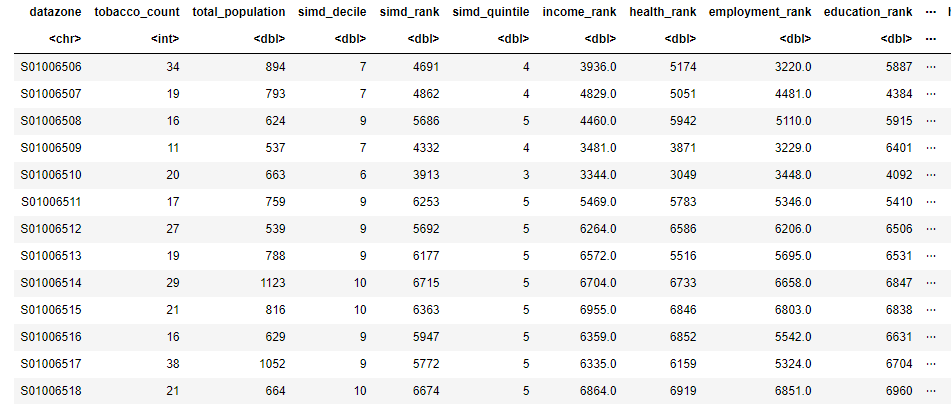

In order to do this we need to join datasets together. Before we get into this, we need to understand the concept of `keys`. 

### Data keys for matching and merging data files <a class="anchor" id="section5.2"></a>

A `key` is used to connect a pair of tables and is a variable (or set of variables) that uniquely identifies an observation. In simple cases as we have here, a single variable is sufficient to identify an observation. For example, each postcode area in Scotland is uniquely identified by its postcode value and where postcode values appear in multiple datasets we can join them together (e.g. `EH9 2LR` in one dataset can be matched with `EH9 2LR` in another dataset. In some of the other tables, the `datazone` code is a unique `key`. In other words the datazone code `S01006511` in one data table corresponds to the same `S01006511` code in another table. We can use these `key` variables to link all of our data together into one file automatically!

However, the requirement for all of this to work is that the `key` variable needs to be unique in <b>at least one of the tables to be joined</b>. You can think through why this is.. 

its because otherwise there is no way to know which of the two identical postcodes or datazones we should connect to. The visual illustration below may help you see this (source: Wickham 2017):

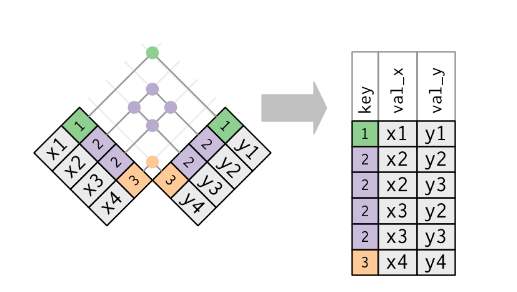

Hopefully this illustrates this a little more clearly. The image on the left shows two separate datafiles that we want to join. Each datafile has a variable that we want to join together (`x` in one dataset and `y` in the other). As you can see in the image on the right, joining these datasets together is difficult because the `keys` in each are not unique (in other words, each datafile has more than one `2` value, i.e. there are duplicates). We call this situation `duplicate keys`.

So, taking all of this into account, we need to do our matching process as follows:

1. Firstly, because our `tobaccoretailers` table has no `datazone` code, we need to get it from another file which has both the datazone code AND a postcode value. We know that the `postcodes` table has both so if we join these two tables together using the `postcode` value we will get the `datazone` added to the tobacco retailer table. But before we do this this, we need to check that postcode is indeed unique in the postcodes file to avoid a duplicate keys situation.

2. Once we remove duplicate keys, we can then connect the `retailers` table to the `postcodes` table.

3. We then need to `aggregate` (in other words summarise) the tobacco retailer table so that it shows the number of retailers in each datazone. In other words, we *collapse* the tobacco retailer table into a row per datazone with a new variable which includes counts of retailers in each datazone (you can see this in the second column in the image above):

4. We then join all of the other tables (`urban_rural` and `simd`) to this `aggregated` table based on the datazone code as the `key`. 

So let's do this step by step...

### Step 1: Checking we have unique postcodes<a class="anchor" id="section5.3"></a>

We can use the `duplicated` function to check if we have any duplicated observations. This function returns either `TRUE` or `FALSE` if the observation is a duplicate. Here we use it to test each observation in the variable `postcode` in the table `postcodes`. We take the output and put it in a new object called `dupes`. If we run the `sum` function on this it will tell us if any of items in the `dupes` object are true. When we run it we see there are none (i.e. it returns a 0)

In [ ]:
head(postcodes)

In [ ]:
dupes <- duplicated(postcodes$postcode)
sum(dupes)

If we had found some duplicates, we could use the `distinct()` function to automatically remove them whilst keeping all of our variables...

In [ ]:
postcodes <- distinct(postcodes, postcode, .keep_all = TRUE)
head(postcodes)

### Step 2: Bring datasets together with full_join() and check with anti_join()<a class="anchor" id="section5.4"></a>

Now that we know `postcode` uniquely identifies observations in the `postcodes` table we can go ahead with step 2 which is linking the `tobaccoretailer` table with the `postcodes` table. This will attach a `datazone` to our `tobaccoretailer` table.

We do this using the `full_join()` function and the syntax is actually pretty straightforward. We first supply the name of the table we are joining to (in this case `tobaccoregister`), then we specify the table that is being joined (in this case `postcodes`) and then finally we specify the variable that we want to use as the `key` in both tables using the `by = ...` syntax. 

<b>Note that we are using the `%>%` again here so we dont need to supply the first argument i.e. `tobaccoregister` as the first argument in the `full_join()` brackets</b> 

In [ ]:
#Merge the tob register data with the postcode data
tobaccoregister <- tobaccoregister %>%
    full_join(postcodes, by = "postcode")

head(tobaccoregister)

In [ ]:
head(tobaccoregister)

If you scroll to the left side of the new table above, you will see all of the variables have now been added to the corresponding observation in the `tobaccoregister` table based on the matching postcode.

This is great, but one the key thing to consider when merging tables in this way is that we should always check to see if any of the retailers *didnt* get matched (i.e. in this case any postcodes that couldnt be matched). 

A useful way to do this is to use the `anti_join()` function. This does exactly the same thing as `full_join()` but instead looks at the observations that *don't* match and drops all of the other observations. In other words it gives us a list of the observations in the `tobaccoregister` table that couldnt be matched to a postcode. This is useful to help us figure out why this is the case.   

In [ ]:
#Do an "anti-merge" to check things that didnt merge
anti_joined_file <- tobaccoregister %>%
    anti_join(postcodes, by = "postcode")

dim(anti_joined_file)
head(anti_joined_file)

Using the `dim()` and `head()` functions on this new table we can see we have 457 unmatched cases. Try looking up some of these postcodes in google. You should see that they either dont exist or that they are no longer in use. For a proper project we might attempt to fix this problem but for the purposes of this exercise we will just ignore them.

Going back to our newly joined `tobaccoregister` data we, now need to remove these observations. If we run the below code we can see that all of these ummatched observations are still included. 

In [ ]:
tobaccoregister %>% 
    filter(is.na(DataZone2011Code)) %>%
    select('Premises Name', DataZone2011Code)

Lets remove these now and while we are at it let's also clean up other parts of the table including removing variables we dont need and renaming the remaining variables.

In [ ]:
tobaccoregister <- tobaccoregister %>% 
    filter(!is.na(DataZone2011Code)) %>%
    select(DataZone2011Code, postcode) %>%
    rename(datazone = "DataZone2011Code")

head(tobaccoregister)

Now we have a really clean dataset to work with.

### Step 3: Aggregating data with group_by() and summarize()<a class="anchor" id="section5.5"></a>
The retailers table now contains a row of data per retailer but we need to <b>aggregate</b> this so that it contains the total number of retailers per datazone. This is a very common task in data science, especially in geography where we often interested in area measures and characteristics.

The process to do this is very straightforward using a combination of the `group_by()` and `summarize()` functions. We use `group_by()` to identify groups (in this case by datazone) and `summarise()` to calculate some summary measure in each of these groups (in this case a simple `sum`).

Let's do this below. The code structure is the same as we have seen many times before. The only slightly different thing is the `retailer_count=n()` argument. But all this says is create a new variable called `retailer_count` which is a count of all of the observations in each of the groups identified by `group_by()`. The `=n` part just reflects the fact that R refers to the total number of observations as `n`. In other words for each datazone, count the total number of observations.  

In [ ]:
#Now we need to aggregate by the count of premises
tobaccoregister <- tobaccoregister %>%
    group_by(datazone) %>%
    summarise(retailer_count=n())

head(tobaccoregister)

Now we can see that for each datazone, we have a <b>count</b> of the total numbers of retailers in each datazone.  

### Step 4: Merging all of the remaining files together<a class="anchor" id="section5.6"></a>

We now just need to merge all of the remaining files to to our new `tobaccoregister` table, including the `simd`, `urban_rural` and `smoking` tables. For each of these, and as before, I also do an `anti_join()` to check for any unmatched cases. 

In [ ]:
#Merge the aggregated tobacco data with the simd data
tobaccoregister <- tobaccoregister %>%
    full_join(simd, by = "datazone")

unmatched <- tobaccoregister %>%
    anti_join(simd, by = "datazone")

head(unmatched)

In [ ]:
#Merge this data with the pregnancy smoking data
tobaccoregister <- tobaccoregister %>%
    full_join(smoking, by = "datazone")

unmatched <- tobaccoregister %>%
    anti_join(smoking, by = "datazone")

head(unmatched)

### Exercise<a class="anchor" id="exercise5"></a>

1. Perform a `full_join()` between our joined `tobaccoregister` data and the last file - `urban_rural`.
2. Check this join by also doing an `anti_join()` between the same variables and check if there are any unmatched observations. HINT for 1 and 2: look at the code above...
3. Check the whole dataset to make sure all of the new variables have been added. HINT remember `head()` and `colnames()`

In [ ]:
#Answers
tobaccoregister <- tobaccoregister %>%
    full_join(urban_rural, by = "datazone")

unmatched <- tobaccoregister %>%
    anti_join(urban_rural, by = "datazone")

head(unmatched)

head(tobaccoregister)
colnames(tobaccoregister)

#### [Go back to table of contents](#contents)

## 6. Variable recoding <a class="anchor" id="section6"></a>

### Missing data<a class="anchor" id="section6.1"></a>

Sometimes, data is missing for a variety of reasons. You may have seen some missing information when looking at the datafiles. Missing data is quite problematic for lots of reasons and we will discuss this in more detail later in the course. For now, we just need to know how to remove missing data as part of our data cleaning process. <b>NOTE! Simply removing missing data is not always reccomended without some understanding of WHY the data is missing in the first place. Doing so can cause issues with our analysis and particularly our interpretation. We will explain why later on in the course but perhaps have a think now about why this might be!</b>

The code below removes all missing cases from our data...

In [ ]:
#Remove all missing data
tobaccoregister <- tobaccoregister %>%
    filter_all(all_vars(!is.infinite(.))) %>%
    filter_all(all_vars(!is.na(.)))

This code is a little complex. But don't worry, we will return to this in a later practical. For now we just need to remove the missing cases in the dataset so they dont cause problems later.

### Recoding<a class="anchor" id="section6.2"></a>

Sometimes, we need to make changes to the information that is actually stored in variables. This is often in the context of categorical variables. For example, we might need to reduce the number of urban and rural categories from:

- Large Urban Areas
- Other Urban Areas
- Accessible Small Towns
- Remote Small Towns
- Very Remote Small Towns
- Accessible Rural Areas
- Remote Rural Areas
- Very Remote Rural Areas

To something much simpler, such as:

- Urban
- Rural

Or we might want to change a continuous variable like age into something categorical (e.g. 20-25, 36-30 etc). Both of these changes are called recoding because we are changing the content of the variable in some way for the purposes of our analysis. As part of this process, we should create new variables, rather than changing the ones we have so that we do not overwrite our existing data.

So let's create some new variables and some recodes based on the following:

- 1) Change the retailer count variable into something more useful (i.e. number of retailers per 1000 population) 
- 2) Create new categorical variables from the access and income deprivation rank variables

To do all of this we use a function called `mutate()`. Mutate, as the name suggests, is used to make changes to existing variables. Let's start with number 1.

In [ ]:
#Create new variables
tobaccoregister <- tobaccoregister %>%
    mutate(retailers_adj = (retailer_count/total_population)*1000)

Hopefully the code structure is starting to look familiar! We are using the `tobaccoregister` object which we have created so far, and using `mutate` we are creating a new variable called `retailers_adj`. This new variable is the number of tobacco retailers for every 1000 people in each datazone. Hopefully the formula in the code makes sense based on this definition!

We can check out this new variable now and compare it to the variables used to create it:

In [ ]:
tobaccoregister %>% 
  select(retailers_adj, retailer_count, total_population)

head(tobaccoregister)

Next, we are going to create categorical variables from the access deprivation and income deprivation variables. We can use the `ntile()` function for this in combination with `mutate()`. `ntile()` is short for "percentile" which means creating groups at different percentile cutoffs (e.g. 10%-20%, 21%-30% etc). 

In [ ]:
tobaccoregister <- tobaccoregister %>%
    mutate(income_quintile = ntile(income_rank, 5), 
           access_quintile = ntile(access_rank, 5))

Here you can see that we are using a similar format as we did before but this time using `ntile`. First we name our variable (`income_quintile` and `access_quintile`) and then we use `ntile` to determine the variable(s) to categorise (in this case `income_rank` and `access_rank`) and the number of groups we want to create (in this case 5). Note: "quintile" means "five groups". Let's look at these new variables.

In [ ]:
tobaccoregister %>% 
  select(income_quintile, income_rank, access_quintile, access_rank)

You should be able to see that the new variables now have grouping labels (1-5). 

This next part is important. Although we have created these new categorical variables, R doesnt see them as categorical and is still treating them as numerical (or continuous). We have some other categorical variables in our data as well so in total the following are categorical:

- `simd_decile`
- `simd_quintile`
- `UR6_2013_2014`
- `income_quintile`
- `access_quintile`

Let's look at our data again...

In [ ]:
head(tobaccoregister)

If you look underneath the variable names of the variables that we identified above, they all have `dbl` or `int` written below them which stands for double and integer respectively. These are numeric data types and not factors. Another way to check this for individual variables is to use the `class()` function. Let's do this for the `income_quintile` variable:

<b>NOTE: Remember from key methods that the `$` symbol is a way to access a particular variable within a dataset.</b>

In [ ]:
class(tobaccoregister$income_quintile)

Keeping these variables as numeric will cause problems for us later on when we come to do our analysis because R needs to know what type of variables are which are in order to run the appropriate staistical model.

So let's change the variable to a factor. We do this using the `as.factor` function which we can use alongside `mutate`.

In [ ]:
tobaccoregister <- tobaccoregister%>%
    mutate(income_quintile = as.factor(income_quintile))

Let's check it has changed the type...

In [ ]:
tobaccoregister %>%
    select(income_quintile)

You should be able to see that it has changed to a factor. 

### Labelling variables<a class="anchor" id="section6.3"></a>

Now we need to add some variable labels. Remembering that the SIMD ranks go from most deprived (rank 1) to least deprived (highest rank value). So let's add some meanigful value labels using the code below. Again, we are using `mutate` together with the `fct_recode` command. 

In [ ]:
tobaccoregister <- tobaccoregister%>%
    mutate(income_quintile = fct_recode(income_quintile, 
                                        "Most deprived" = "1", 
                                        "Second" = "2", 
                                        "Third" = "3", 
                                        "Fourth " = "4", 
                                        "Least deprived" = "5"))

Let's check the labels have been added.

In [ ]:
tobaccoregister %>%
    select(income_quintile)

We also of course do all of this in one command using the pipe again. Let's do this with the `access_quintile` variable:

In [ ]:
tobaccoregister <- tobaccoregister%>%
    mutate(access_quintile = as.factor(access_quintile) %>%
      fct_recode("Most deprived" = "1", "Second" = "2", 
      "Third" = "3", "Fourth " = "4", "Least deprived" = "5"))

And check...

In [ ]:
tobaccoregister %>%
    select(access_quintile)

### Exercise<a class="anchor" id="section6.4"></a>

1. Convert the urban and rural variable `UR6_2013_2014` to a factor.


2. Apply the following labels to the new factor variable:
    - 1 = Large Urban
    - 2 = Other Urban
    - 3 = Accessible Small Towns
    - 4 = Remote Small Towns
    - 5 = Accessible Rural
    - 6 = Remote Rural
    
    
2. Create a new variable called `urban_rural_2cat` by recoding the `UR6_2013_2014` variable. We want this variable to have two categories:
    - 1 = urban
    - 2 = rural

Use your best judgement to decide how to categorise the 6 original categories.  

In [ ]:
#Answers
#1
tobaccoregister <- tobaccoregister%>%
    mutate(UR6_2013_2014 = as.factor(UR6_2013_2014))

#2
tobaccoregister <- tobaccoregister %>%
    mutate(UR6_2013_2014 = fct_recode(UR6_2013_2014,
                                    "Large Urban" = "1",
                                    "Other Urban" = "2",
                                    "Accessible Small Towns" = "3",
                                    "Remote Small Towns" = "4",
                                    "Accessible Rural" = "5",
                                    "Remote Rural" = "6"))

#3 
tobaccoregister <- tobaccoregister%>%
    mutate(urban_rural_2cat = fct_recode(UR6_2013_2014,
                                    "Urban" = "Large Urban",
                                    "Urban" = "Other Urban",
                                    "Urban" = "Accessible Small Towns",
                                    "Urban" = "Remote Small Towns",
                                    "Rural" = "Accessible Rural",
                                    "Rural" = "Remote Rural"))

#### [Go back to table of contents](#contents)

## 7. Write the final dataset to a new file <a class="anchor" id="section7"></a>

We now have our final dataset which has been cleaned and joined with the other datasets. At the moment the file is stored in memory, and when we exit the notebook it will be lost. This isnt a big deal because we can just re-run our code above to recreate it (this is the real strength of using code to do our analysis because once the code is written we can quickly and easily re-run it without clicking all of the menus). However, it is good practice to save the datafile to the hard drive. We will save it as a `csv` spreadsheet file as this is the most versatile and compatible format.

To do this we just need to use a command called `write_csv()`. This command takes a number of arguments but all we really need to worry about is supplying two arguments; one for the object that we want to create our file from and the other the name of the file we want to create. The rest is pretty straightforward! The code we use is below. Once you run this, take a look at your notable files page and check to see the new file (called "merged_data.csv") appears in the list.

In [ ]:
write_csv(tobaccoregister, "merged_data.csv")

Note that it is also possible to save a file specifically for excel. The file we created above is a generic `csv` file which you would have to import into excel. However, saving it as an Excel csv file would mean it can be opened directly in excel by double clicking the file to open it.

The code to do this is below and is very similar to the above, just using a slightly different command.

In [ ]:
write_excel_csv(tobaccoregister, "excel_version.csv")

If you go back and check your noteable files area you should see a new file called `excel_version.csv`. If you download this file you should be abel to open it easily in excel and view everything we have done today.

#### [Go back to table of contents](#contents)

## 8. Conclusion <a class="anchor" id="section8"></a>

That is the end of the first practical exercise. We have covered an awful lot of ground but have covered the fundamental tasks that we often face when preparing and cleaning a new dataset. All of these skills are crucial tools in the data science toolbox. The next practical will explore how we would go about analysing this data, producing plots, visualisations and graphs using `ggplot2` as well as regression modelling approaches including multiple linear regression.

#### [Go back to table of contents](#contents)